<a href="https://colab.research.google.com/github/swoodums/Python-Learning/blob/main/pandasLesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv', index_col=0, parse_dates=True) #Loads sample air quality data from GitHub source
   # the index_col=0 sets the first column as the index, and parse_dates=True converts the dates in the column to a timestamp.
air_quality  #previews data

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


#How to create plots in pandas
I want a quick visual check of the data.

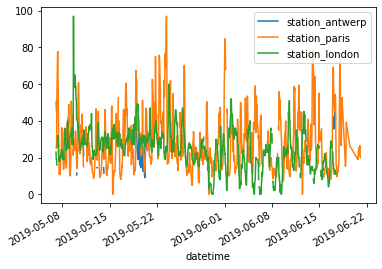

In [3]:
air_quality.plot()

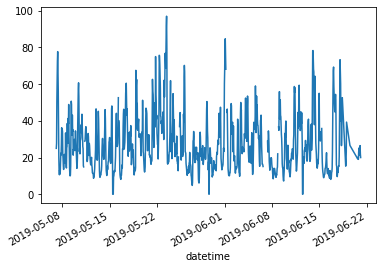

In [4]:
#Pretty noisy.  Let's plot just the Paris data.
air_quality['station_paris'].plot()

I want to visually compare the N02 values measured in London vs. Paris

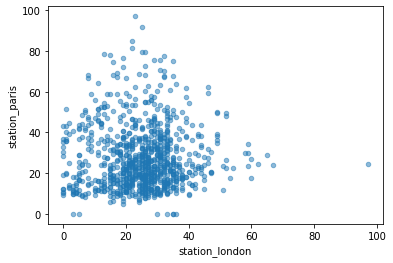

In [5]:
air_quality.plot.scatter(x = 'station_london', y = 'station_paris', alpha=0.5)  #sets the London station measurements on the x-axis, and the Paris station measurements on the y-axis.  Could potentially show a correlation between measurements made in Paris and measurements made in London.

In [7]:
# Use standard Python to get an overview of available plotting methods:
[
  method_name
  for method_name in dir(air_quality.plot)
  if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


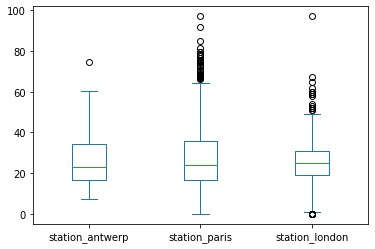

In [10]:
# One of the plot methods available is a boxplot: Dataframe.plot.box()
air_quality.plot.box()

I want each of the columns in a separate subplot.

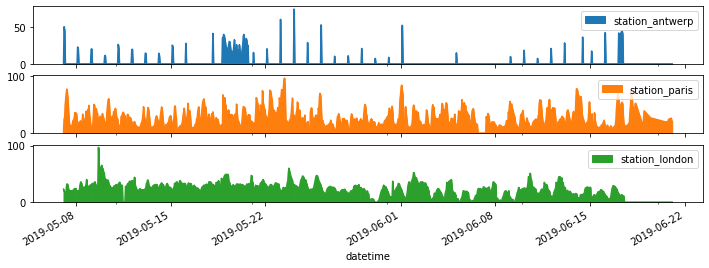

In [14]:
axs = air_quality.plot.area(figsize=(12,4), subplots = True)  #Here, the argument subplots=True splits each series of the dataframe to its own plot.  The figsize argument controls the size of the output figure.

I want to further customize, extend, or save the resulting plot.

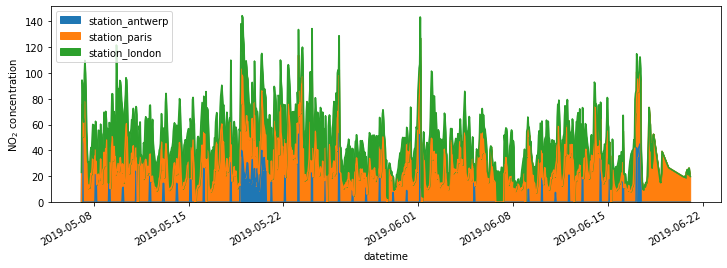

In [19]:
fig, axs = plt.subplots(figsize=(12,4))  #create a plot of size 12x4 and axes.
air_quality.plot.area(ax=axs)           #puts the area plot on the assigned figure and axes
axs.set_ylabel("NO$_2$ concentration")  #sets y-label to N0(subscript)2
fig.savefig("no2_concentrations.png")

#Summary and Recap

*   The .plot.* methods are applicable on both DataFrames and Series.
*   By default, each of the columns is plotted as a different element (line, boxplot, etc.)
*   Any plot created by pandas is a matplotlib object




